# Convolutions and Edge Detection
In this notebook I will go over convultions, what they are, what they are used for and how we perform them. The first example will be of a basic 1 dimensional convultion. This example will be demonstrated using both the `numpy` library and using a simple python for loop. After that I will go over a 2 dimensional convulition using a basic array and then a image. This will lead into explaining some of the usses for this at the end of this notebook. Things that will be useful to understand before this are basic python and arrays.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

# 1D Convolution
A convolution is when we have an array and we multiply it over another array adding those values together to in the end create a completely different array. Below is an example of a 1D convolution in one line. This will demonstrate how we perform convolutins in `numpy` using the function`np.convolve()`. The way this functions works is we give it some array we want to perform a convolution on and a kernel we want to apply to it. Therefore the inputs of our function are `np.convolve(array, kernel, padding)`. The padding will either add zeroes to the end or wont (in this case we will). Then we have our new array

In [2]:
# np.convolve(array, kernel, padding)
np.convolve([1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 0], [0.1, 0.2], 'same') # doing a 1D convolution with numpy

array([0.1, 0.3, 0.3, 0.4, 0.6, 0.7, 0.9, 0.7, 0.3, 0.3, 0.3, 0.2])

Now that we have used a library to implement a convolution I will use a simple python for loop to do the same. 

In [3]:
def preform1DConvolution(kernel, arr):
    # new array
    result = [] 
    for i in range(len(arr)-len(kernel)):
        # get the sum of kernel multiplied by the array
        res = kernel[1] * arr[i] + kernel[0] * arr[i+1]
        # add the sum to a new array
        result.append(round(res,1))
    return result

In [4]:
arrayOne = [0.1, 0.2,]
arrayTwo = [0, 1, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 0, 0]

As we can see below we have the same result that using `np.convolve()` gave us.

In [5]:
preform1DConvolution(arrayOne, arrayTwo) 

[0.1, 0.3, 0.3, 0.4, 0.6, 0.7, 0.9, 0.7, 0.3, 0.3, 0.3, 0.2]

# 2D Convolutions
Now that we have gone over 1D convolutions we can go over 2D convolutions. Similar to what we just did 2D convolutions the difference however is that we now have a 2D array. In this section I do a similar proccess of using a library to perform the convolutions as well as implemeting my own function to do the convolutions. Doing 2D convolutions will help us better understand what is happening when we apply a kernel to a image(array). To demonstrate I will first apply a kernel to a simple 2D array and after I will apply it to a black and white image.

In [6]:
def preform2DConvolution(kernel, arr):
    """
    from row 0 to row 3, the 0 column
    print(arr[0:3:,0])
    
    from row 0 to row 3, the 1 column
    print(arr[0:3:,1])

    from row 0 to row 3, the 2 column
    print(arr[0:3:,2])

    """
    newArr = []
    rows, cols, = arr.shape[0], arr.shape[1]
    height = len(kernel)

    for x in range(0, rows-(len(kernel)-1)):
        listOfPixels = []
        for y in range(0, cols-(len(kernel)-1)):
            oneP = np.multiply(arr[x:x+height:,y], kernel[0:height:,0]) 
            twoP = np.multiply(arr[x:x+height:,y+1], kernel[0:height:,1])
            threeP = np.multiply(arr[x:x+height:,y+2], kernel[0:height:,2]) 
            pixel = sum(oneP) + sum(twoP) + sum(threeP)
            listOfPixels.append(pixel)
        newArr.append(listOfPixels)
    return np.array(newArr)

Above is a function that will peform a convolution given a kernel and a 2D array. Now we will define our arrays and kernels so we can use our function

In [7]:
# my simple 2D array
simple_array = np.array([[3, 3, 2, 1, 0],[0, 0, 1, 3, 1], [3, 1, 2, 2, 3], [2, 0, 0, 2, 2], [2, 0, 0, 0, 1]])
# the kernel we will use on the image
simple_kernel = np.array([[0, 1, 2],[2, 2 , 0], [0, 1, 2]])

Here is what our image/array looks like originally. Once we apply the kernel we will see how the it changes

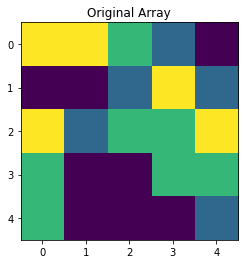

In [8]:
plt.imshow(simple_array)
plt.title('Original Array')
plt.show()

In [9]:
# performing the convolution using the array and kernel defined above
new_array = preform2DConvolution(simple_kernel, simple_array)

Here we have the new array. As we can see it is for sure different from our original array. It looks different and is also smaller given that I did not add padding like in the beggining. Most importantly though its not really exciting. Theres not much to see so now we will use images to better demonstrate convolutions.

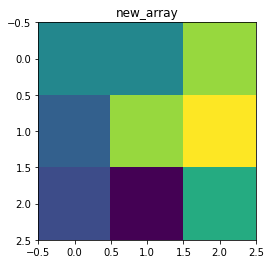

In [10]:
plt.imshow(new_array)
plt.title('new_array')
plt.show()

# Performing Convolutions on Images
Here I will show adding a filter to a real image rather than an array with random numbers. This will definitly result ina big visual change. I will first display the photo in its original form then I will apply a black and whilte filter. The reason for applying the black and white filter is because the image in its true colored form is 3 dimensional and my function only performs 2D convolutions. Applying a black and white filter will reduce it to 2 dimensions. However once we have it in black in white we will apply another filter. 

In [11]:
# load the image
bernie_img = cv2.imread("bernieMuni.jpg", 3)
b,g,r = cv2.split(bernie_img)
bernie = cv2.merge([r,g,b])

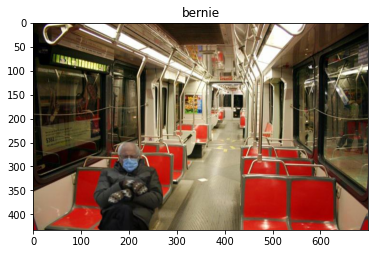

In [12]:
# display image in its true form
plt.imshow(bernie)
plt.title('bernie')
plt.show()

In [13]:
# create coopy of the image
bernie_img_copy = bernie.copy()
# apply a grayscale filter
gray_bernie = cv2.cvtColor(bernie_img_copy, cv2.COLOR_BGR2GRAY)

Above is our orignal photo and below is our new image. We can see that there is a huge change. Now that our photo is in black and white (meaning 2 dimensional) we can apply our kernel. 

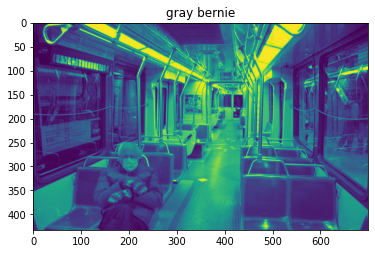

In [14]:
# display new photo
plt.imshow(gray_bernie)
plt.title('gray bernie')
plt.show()

In [15]:
# create the kernel
horizontal_sobel_kernel = np.array([[1, 0, -1],[2, 0 , -2], [1, 0, -1]]) 
# apply the kernel to the bernie image
filterd_bernie = preform2DConvolution(horizontal_sobel_kernel, gray_bernie)

Above is our black and white image and below is that same image with a filter(kernel) applied to it. This kernel is part of the Sobel edege detection kernel. This helps us detect edges in images. As we can see things such as handle bars and windows are clrealy stading out. Applying these kernels to images can help us gather important information from images. In my next example I will go a little more into that. 

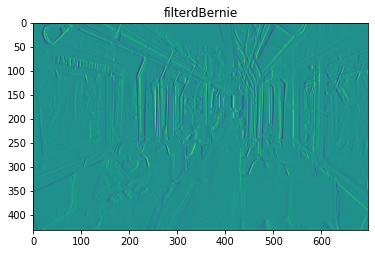

In [16]:
# display new array
plt.imshow(filterd_bernie)
plt.title('filterdBernie')
plt.show()

# Edge Detection
As explained earlier we can apply filters to get information from images. In this example below I will apply some filters to an image I took my self of my notebook and pack of gum. I will then apply a edge detection filter which will give highlight some edges in our photo. 

In [17]:
# load image
gum = cv2.imread("gum.jpg")

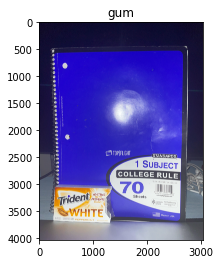

In [18]:
plt.imshow(gum)
plt.title('gum')
plt.show()

The reason for which we apply a blur to the image is so that we can get rid of any noise in the image and stop the kernel from picking up on edges that are not anything. This can look like a bunch of white little dots on the image or a bunch of white lines. So we apply the blur before so that applying our edge detection filter after wont pick up on these non important small edges. 

In [19]:
blur = cv2.GaussianBlur(gum, (5,5), 0)
edges = cv2.Canny(blur, 180, 200)

As we can see from the image below we can for sure make out a number `70` in the image. We can also make out other letters more so than words. For example we can make out the letter `T` in the pack of gum at the bottom left as well as the `T` in the notebook on the right. This can be useful as we can use this information to then pass this on to models to predict something or for some other use. 

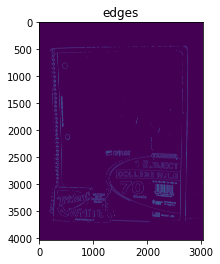

In [20]:
plt.imshow(edges)
plt.title('edges')
plt.show()

# Conclusion
We have learned about what convolutions are and what they do. We have also implemented them and gotten to understand what how exactly they work. We went over some basic uses cases and some more slightly involved. As we have seen convolutions are important to how we apply filters to images. They are also very important for extracting data from images which is very important for computer vision. I only got into some of the basics of convolutions here and it was cool to learn